In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [43]:
chips = pd.read_csv("chips.csv")
geyser = pd.read_csv("geyser.csv")

## Подготовка данных

In [44]:
chips_feat = chips.drop("class", axis=1).values
chips_label = chips["class"]
chips_label = (chips_label == "N").astype(int)*2 - 1

geyser_feat = geyser.drop("class", axis=1).values
geyser_label = geyser["class"]
geyser_label = (geyser_label == "N").astype(int)*2 - 1

### Построим график для первого датасета и увидим, что он линейно не разделим

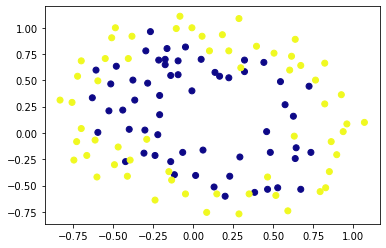

In [45]:
plt.scatter(chips_feat[:,0], chips_feat[:,1], c=chips_label, cmap='plasma')

### Второй получше

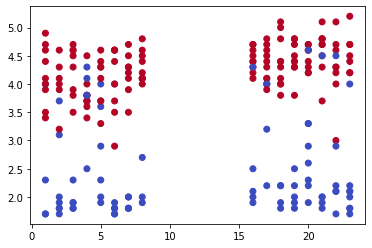

In [46]:
plt.scatter(geyser_feat[:,0], geyser_feat[:,1], c=geyser_label, cmap='coolwarm')

In [47]:
chips_feat_train, chips_feat_test, chips_label_train, chips_label_test = train_test_split(chips_feat, chips_label)
geyser_feat_train, geyser_feat_test, geyser_label_train, geyser_label_test = train_test_split(chips_feat, chips_label)

## Инициируем модели и поиск гиперпараметров

In [48]:
params1 = {"C" : [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]}
params2 = {"C" : [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0], "degree" : range(2, 6)}
params3 = {"C" : [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0], "gamma" : [1, 2, 3, 4, 5, "scale", "auto"]}

lin_grid = GridSearchCV(svm.SVC(kernel='linear'), params1, n_jobs=-1)
poly_grid = GridSearchCV(svm.SVC(kernel='poly'), params2, n_jobs=-1)
rbf_grid = GridSearchCV(svm.SVC(kernel='rbf'), params3, n_jobs=-1)

## Работаем с первым датасетом

### Подбираем гиперпараметры

In [49]:
lin_grid.fit(chips_feat, chips_label)
poly_grid.fit(chips_feat, chips_label)
rbf_grid.fit(chips_feat, chips_label)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0],
                         'gamma': [1, 2, 3, 4, 5, 'scale', 'auto']})

In [50]:
lin_score = accuracy_score(chips_label, lin_grid.predict(chips_feat))
poly_score = accuracy_score(chips_label, poly_grid.predict(chips_feat))
rbf_score = accuracy_score(chips_label, rbf_grid.predict(chips_feat))

print(f"for SVM with linear kernel: {lin_grid.best_params_}, accuracy: {lin_score}")
print(f"for SVM with polynominal kernel: {poly_grid.best_params_}, accuracy: {poly_score}")
print(f"for SVM with round-based kernel: {rbf_grid.best_params_}, accuracy: {rbf_score}")

for SVM with linear kernel: {'C': 0.05}, accuracy: 0.5084745762711864
for SVM with polynominal kernel: {'C': 0.05, 'degree': 4}, accuracy: 0.7372881355932204
for SVM with round-based kernel: {'C': 50.0, 'gamma': 'auto'}, accuracy: 0.847457627118644


### Обучаем и строим графики

In [51]:
model1 = svm.SVC(kernel='linear', C=0.05)
model2 = svm.SVC(kernel='poly', C=0.05, degree=4)
model3 = svm.SVC(kernel='rbf', C=50.0, gamma="auto")

model1.fit(chips_feat, chips_label)
model2.fit(chips_feat, chips_label)
model3.fit(chips_feat, chips_label)

models = [model1, model2, model3]

In [52]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

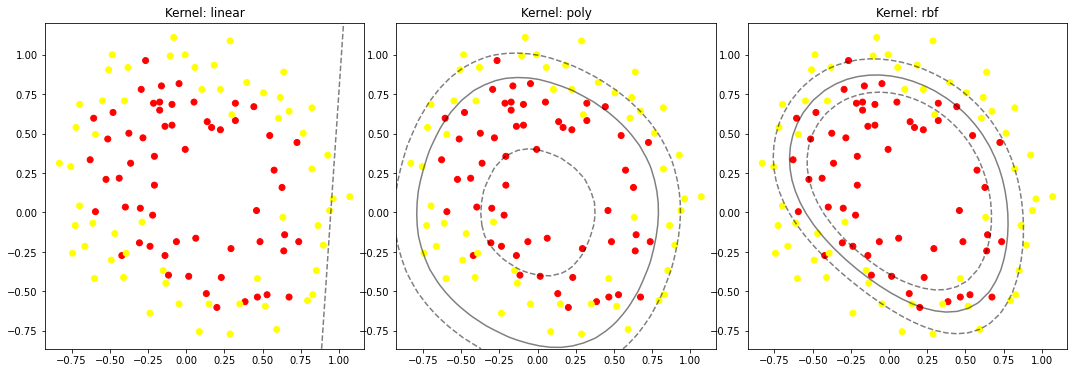

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
kernel = ["linear", "poly", "rbf"]
for axi, i in zip(ax, range(3)):
    axi.scatter(chips_feat[:, 0], chips_feat[:, 1], c=chips_label, cmap='autumn')
    plot_svc_decision_function(models[i], axi);
    axi.set_title(f'Kernel: {kernel[i]}')

## Работаем с вторым датасетом

### Подбираем гиперпараметры

In [54]:
lin_grid.fit(geyser_feat, geyser_label)
poly_grid.fit(geyser_feat, geyser_label)
rbf_grid.fit(geyser_feat, geyser_label)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0],
                         'gamma': [1, 2, 3, 4, 5, 'scale', 'auto']})

In [55]:
lin_score = accuracy_score(geyser_label, lin_grid.predict(geyser_feat))
poly_score = accuracy_score(geyser_label, poly_grid.predict(geyser_feat))
rbf_score = accuracy_score(geyser_label, rbf_grid.predict(geyser_feat))

print(f"for SVM with linear kernel: {lin_grid.best_params_}, accuracy: {lin_score}")
print(f"for SVM with polynominal kernel: {poly_grid.best_params_}, accuracy: {poly_score}")
print(f"for SVM with round-based kernel: {rbf_grid.best_params_}, accuracy: {rbf_score}")

for SVM with linear kernel: {'C': 5.0}, accuracy: 0.9054054054054054
for SVM with polynominal kernel: {'C': 50.0, 'degree': 2}, accuracy: 0.9054054054054054
for SVM with round-based kernel: {'C': 1.0, 'gamma': 'scale'}, accuracy: 0.8918918918918919


### Обучаем и строим графики

In [58]:
model1 = svm.SVC(kernel='linear', C=5)
model2 = svm.SVC(kernel='poly', C=50, degree=2)
model3 = svm.SVC(kernel='rbf', C=1, gamma="scale")

model1.fit(geyser_feat, geyser_label)
model2.fit(geyser_feat, geyser_label)
model3.fit(geyser_feat, geyser_label)

models = [model1, model2, model3]

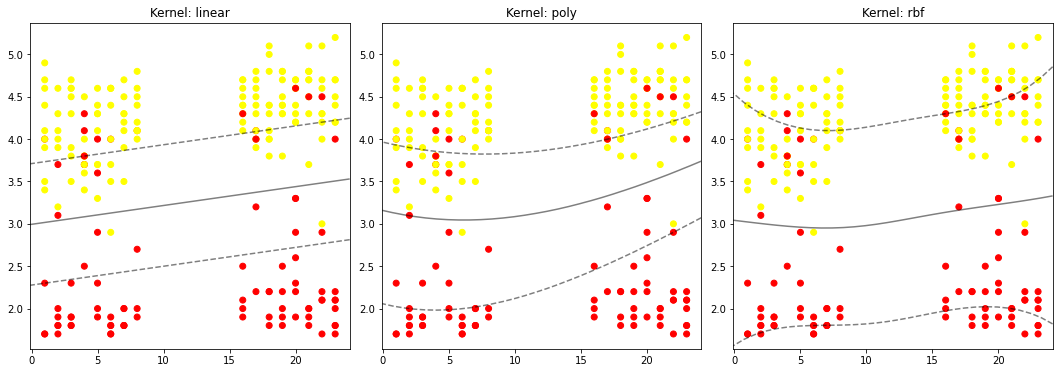

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
kernel = ["linear", "poly", "rbf"]
for axi, i in zip(ax, range(3)):
    axi.scatter(geyser_feat[:,0], geyser_feat[:,1], c=geyser_label, cmap='autumn')
    plot_svc_decision_function(models[i], axi);
    axi.set_title(f'Kernel: {kernel[i]}')